# Part 1 - Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Importing the dataset

In [4]:
dataset = pd.read_excel('ADataset1.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Explosive type     588 non-null    object 
 1   Explosive mass     588 non-null    float64
 2   Standoff distance  588 non-null    float64
 3   Time of arrival    588 non-null    float64
dtypes: float64(3), object(1)
memory usage: 18.5+ KB


In [5]:
# convert categorical variable into dummy variables
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Explosive mass                588 non-null    float64
 1   Standoff distance             588 non-null    float64
 2   Time of arrival               588 non-null    float64
 3   Explosive type_Composition B  588 non-null    uint8  
 4   Explosive type_TNT            588 non-null    uint8  
dtypes: float64(3), uint8(2)
memory usage: 15.1 KB


In [6]:
y = dataset[('Time of arrival')]
X = dataset.drop('Time of arrival', axis=1)
print(X.shape, y.shape)

(588, 4) (588,)


In [7]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 71)

In [9]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 71)

### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:2] = sc.fit_transform(X_train[:, 0:2])
print (X_train)

In [ ]:
X_test[:,0:2] = sc.transform(X_test[:, 0:2])
print (X_test)

In [ ]:
X_val[:,0:2] = sc.transform(X_val[:, 0:2])
print (X_val)

# Part 2 - Building the ANN

### Initializing the ANN

In [10]:
# Set seed for NumPy
np.random.seed(71)

# Set seed for TensorFlow
tf.random.set_seed(71)

ann = Sequential()

### Adding the input layer and the first hidden layer

In [11]:
ann.add(Dense(units=180,
              input_shape=(X_train.shape[1],),
              activation='leaky_relu'))
#ann.add(Dropout(0.1))

### Adding the second hidden layer

In [12]:
ann.add(Dense(units=10,
              activation='leaky_relu'))
#ann.add(Dropout(0.1))

### Adding the output layer

In [13]:
ann.add(Dense(units=1,
              activation='linear'))

### what model looks like

In [14]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 180)               900       
                                                                 
 dense_1 (Dense)             (None, 10)                1810      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2721 (10.63 KB)
Trainable params: 2721 (10.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Part 3 - Training the ANN

### Compiling the ANN

In [15]:
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [16]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [17]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=400,
                    batch_size=50,
                    verbose=1)

Epoch 1/400
9/9 [==============================] - 1s 34ms/step - loss: 268.0409 - mae: 12.9089 - val_loss: 28.2879 - val_mae: 4.5898
Epoch 2/400
9/9 [==============================] - 0s 8ms/step - loss: 37.7825 - mae: 4.8900 - val_loss: 12.1625 - val_mae: 2.7536
Epoch 3/400
9/9 [==============================] - 0s 8ms/step - loss: 24.4546 - mae: 3.9399 - val_loss: 7.2698 - val_mae: 1.8956
Epoch 4/400
9/9 [==============================] - 0s 9ms/step - loss: 10.8013 - mae: 2.4836 - val_loss: 5.3949 - val_mae: 2.0125
Epoch 5/400
9/9 [==============================] - 0s 10ms/step - loss: 6.4595 - mae: 2.2348 - val_loss: 3.9778 - val_mae: 1.6052
Epoch 6/400
9/9 [==============================] - 0s 8ms/step - loss: 3.1252 - mae: 1.3864 - val_loss: 2.2694 - val_mae: 1.2108
Epoch 7/400
9/9 [==============================] - 0s 8ms/step - loss: 2.2370 - mae: 1.2305 - val_loss: 2.2028 - val_mae: 1.1597
Epoch 8/400
9/9 [==============================] - 0s 12ms/step - loss: 2.0011 - mae: 1

### Analyse learn history

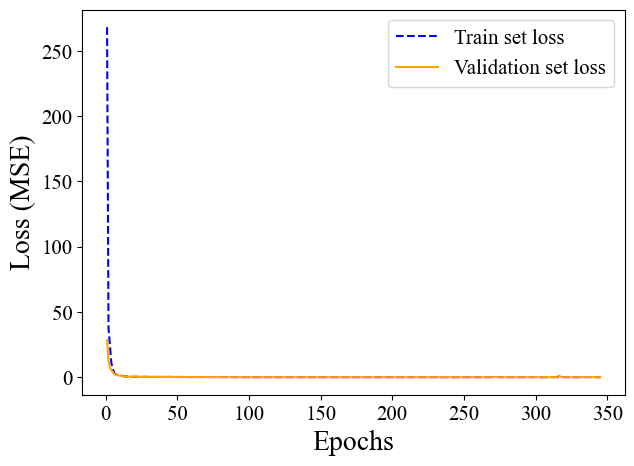

In [43]:
# let's see the training and validation accuracy by epoch
plt.figure(figsize=(7,5))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss', linestyle='--')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Loss (MSE)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.xlim(1, len(loss_values) + 1 )
plt.legend(loc='upper right',fontsize = 15)
plt.show()

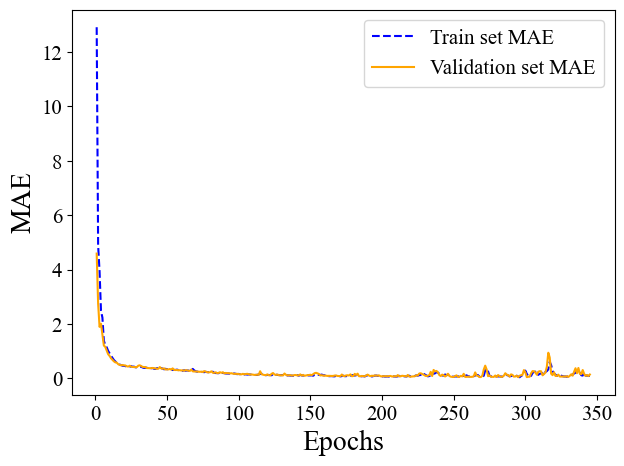

In [19]:
# let's see the training and validation accuracy by epoch
plt.figure(figsize=(7,5))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE', linestyle='--')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('MAE', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='upper right',fontsize = 15)
plt.show()

In [ ]:
print (epochs)

# Part 4 - Make predictions

3/3 [==============================] - 0s 8ms/step


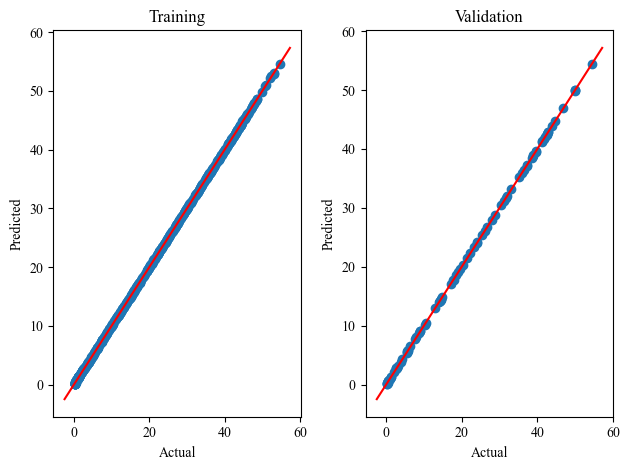

In [20]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [21]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 0s/step
[[23.19 23.23]
 [16.87 16.87]
 [ 1.45  1.41]
 [ 5.02  5.12]
 [ 0.56  0.52]
 [16.5  16.51]
 [ 0.64  0.57]
 [31.59 31.54]
 [ 0.56  0.51]
 [ 0.25  0.3 ]
 [ 5.24  5.26]
 [ 0.17  0.26]
 [ 7.47  7.46]
 [30.04 29.99]
 [ 0.56  0.48]
 [21.35 21.32]
 [ 7.87  7.76]
 [11.2  11.24]
 [19.57 19.55]
 [ 0.71  0.61]
 [34.38 34.34]
 [ 1.72  1.62]
 [36.73 36.71]
 [39.26 39.26]
 [40.28 40.33]
 [ 2.43  2.33]
 [38.16 38.18]
 [21.98 21.98]
 [20.39 20.42]
 [45.78 45.81]
 [15.6  15.62]
 [37.67 37.65]
 [34.48 34.46]
 [ 3.98  4.09]
 [12.54 12.57]
 [33.24 33.22]
 [14.51 14.55]
 [30.71 30.72]
 [ 0.57  0.48]
 [18.55 18.59]
 [ 5.87  5.82]
 [34.29 34.27]
 [ 9.95  9.94]
 [ 9.55  9.57]
 [18.34 18.34]
 [ 3.59  3.68]
 [ 3.64  3.99]
 [31.46 31.42]
 [10.18 10.1 ]
 [19.02 18.99]
 [ 0.18  0.28]
 [32.98 32.92]
 [10.58 10.55]
 [18.42 18.44]
 [ 7.15  7.08]
 [24.59 24.67]
 [28.21 28.17]
 [16.82 16.82]
 [ 3.52  3.61]
 [ 0.63  0.61]
 [ 6.62  6.57]
 [17.54 17.62]
 [10.5  10.51]
 [28.

Text(0, 0.5, 'Predicted data')

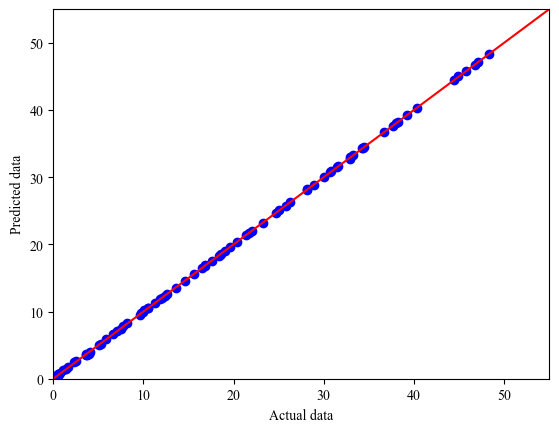

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,55],[0,55], color = "red")
plt.axis ([0,55,0,55])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

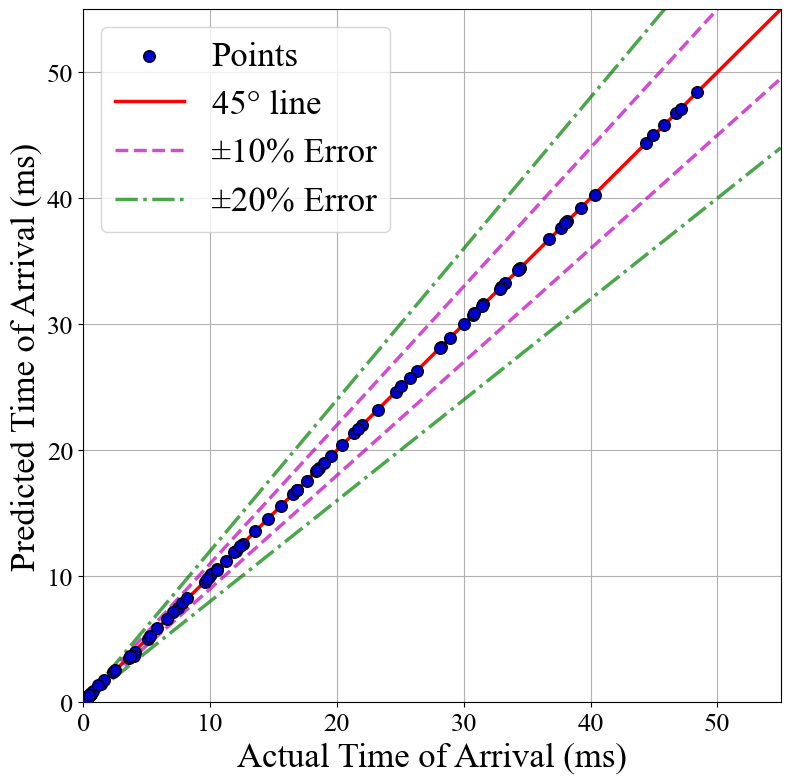

In [25]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


plt.ylabel('Predicted Time of Arrival (ms)',fontsize = 25)
plt.xlabel('Actual Time of Arrival (ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,55)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0,55)
plt.xlim(0,55)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

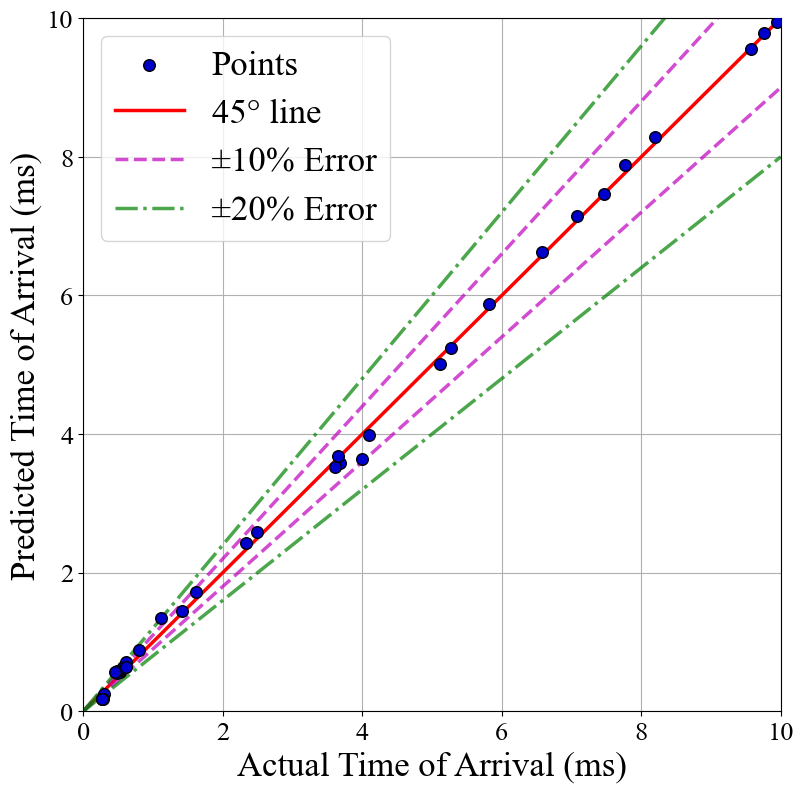

In [26]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


plt.ylabel('Predicted Time of Arrival (ms)',fontsize = 25)
plt.xlabel('Actual Time of Arrival (ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,10)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 10)
plt.xlim(0, 10)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

In [27]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

13/13 [==============================] - 0s 3ms/step
0.044768380521272536
0.05020007508820483


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9999750895429457


In [29]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9999851626038043


In [30]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 86.52%
Within 20% margin 94.38%
Out of 20% margin 5.62%


In [31]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.999973903330705


In [32]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

0.07130019282921461

In [33]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.05020007508820483

In [34]:
ann.save('Arrival_ANN_1_nodrop_noscale.h5')

D:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
ann = load_model('Arrival_ANN_1_nodrop_noscale.h5')

## SHAP

In [4]:
dataset = pd.read_excel('ADataset_adj.xlsx')
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
y = dataset[('Time of arrival')]
X = dataset.drop('Time of arrival', axis=1)
print (X)

     Explosive mass  Standoff distance  Explosive type_Composition B  \
0               0.5                5.5                             0   
1               0.5                6.5                             0   
2               0.5                7.5                             0   
3               0.5                8.5                             0   
4               0.5                9.5                             0   
..              ...                ...                           ...   
583            25.0               19.5                             1   
584            25.0               20.0                             1   
585            25.0                2.5                             1   
586            25.0                3.5                             1   
587            25.0                4.5                             1   

     Explosive type_TNT  
0                     1  
1                     1  
2                     1  
3                     1  
4    

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=71)
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size=0.5,
                                                random_state=71)

In [6]:
import shap
explainer = shap.KernelExplainer(ann.predict, X_train)
shap_values = explainer.shap_values(X_train)

13/13 [==============================] - 0s 3ms/step


Using 411 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/411 [00:00<?, ?it/s]

180/180 [==============================] - 0s 1ms/step


In [7]:
import matplotlib as mpl
cmap = (mpl.colors.ListedColormap(['blue','orange', 'red'])
        .with_extremes(under='yellow', over='red'))

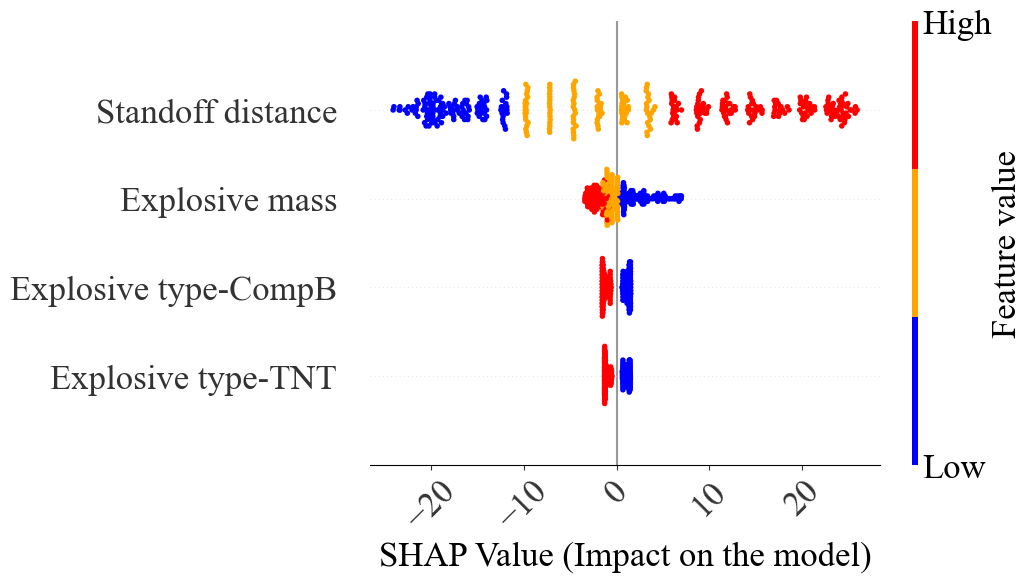

In [9]:
features = ['Explosive mass', 'Standoff distance', 'Explosive type-CompB', 'Explosive type-TNT', ]
shap.summary_plot(shap_values[0], X_train, show=False, feature_names=features, cmap=cmap, plot_type='dot')
fig = plt.gcf()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.gcf().set_size_inches(9,6)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=25)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation=45)

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=25)
cb_ax.set_ylabel("Feature value", fontsize=25)
plt.savefig('SHAP1.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [10]:
#Waterfall Plot (for an instance)
explainer2 = shap.Explainer(ann.predict, X_test)
#X_test.columns=features
shap_values2 = explainer2(X_test)

12/12 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▍       | 22/89 [00:00<?, ?it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  27%|██▋       | 24/89 [00:10<00:09,  7.02it/s]

12/12 [==============================] - 0s 775us/step


ExactExplainer explainer:  28%|██▊       | 25/89 [00:10<00:12,  5.08it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  29%|██▉       | 26/89 [00:10<00:14,  4.40it/s]

12/12 [==============================] - 0s 0s/step


ExactExplainer explainer:  30%|███       | 27/89 [00:11<00:14,  4.23it/s]

13/13 [==============================] - 0s 3ms/step


ExactExplainer explainer:  31%|███▏      | 28/89 [00:11<00:14,  4.17it/s]

13/13 [==============================] - 0s 925us/step


ExactExplainer explainer:  33%|███▎      | 29/89 [00:11<00:14,  4.01it/s]

13/13 [==============================] - 0s 3ms/step


ExactExplainer explainer:  34%|███▎      | 30/89 [00:11<00:15,  3.86it/s]

13/13 [==============================] - 0s 755us/step


ExactExplainer explainer:  35%|███▍      | 31/89 [00:12<00:14,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  36%|███▌      | 32/89 [00:12<00:14,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  37%|███▋      | 33/89 [00:12<00:14,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  38%|███▊      | 34/89 [00:13<00:13,  3.95it/s]

13/13 [==============================] - 0s 922us/step


ExactExplainer explainer:  39%|███▉      | 35/89 [00:13<00:14,  3.79it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|████      | 36/89 [00:13<00:13,  3.83it/s]

13/13 [==============================] - 0s 353us/step


ExactExplainer explainer:  42%|████▏     | 37/89 [00:13<00:14,  3.64it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  43%|████▎     | 38/89 [00:14<00:13,  3.75it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▍     | 39/89 [00:14<00:13,  3.77it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▍     | 40/89 [00:14<00:13,  3.77it/s]

13/13 [==============================] - 0s 880us/step


ExactExplainer explainer:  46%|████▌     | 41/89 [00:14<00:12,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  47%|████▋     | 42/89 [00:15<00:12,  3.79it/s]

13/13 [==============================] - 0s 299us/step


ExactExplainer explainer:  48%|████▊     | 43/89 [00:15<00:11,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  49%|████▉     | 44/89 [00:15<00:11,  3.80it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  51%|█████     | 45/89 [00:15<00:11,  3.79it/s]

13/13 [==============================] - 0s 792us/step


ExactExplainer explainer:  52%|█████▏    | 46/89 [00:16<00:11,  3.61it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  53%|█████▎    | 47/89 [00:16<00:11,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  54%|█████▍    | 48/89 [00:16<00:10,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  55%|█████▌    | 49/89 [00:16<00:10,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  56%|█████▌    | 50/89 [00:17<00:10,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  57%|█████▋    | 51/89 [00:17<00:09,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  58%|█████▊    | 52/89 [00:17<00:09,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  60%|█████▉    | 53/89 [00:18<00:09,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████    | 54/89 [00:18<00:08,  4.03it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  62%|██████▏   | 55/89 [00:18<00:08,  4.03it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  63%|██████▎   | 56/89 [00:18<00:08,  4.07it/s]

13/13 [==============================] - 0s 350us/step


ExactExplainer explainer:  64%|██████▍   | 57/89 [00:19<00:08,  3.91it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▌   | 58/89 [00:19<00:07,  3.97it/s]

13/13 [==============================] - 0s 3ms/step


ExactExplainer explainer:  66%|██████▋   | 59/89 [00:19<00:07,  4.02it/s]

12/12 [==============================] - 0s 955us/step


ExactExplainer explainer:  67%|██████▋   | 60/89 [00:19<00:06,  4.15it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  69%|██████▊   | 61/89 [00:19<00:06,  4.08it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|██████▉   | 62/89 [00:20<00:06,  4.03it/s]

13/13 [==============================] - 0s 3ms/step


ExactExplainer explainer:  71%|███████   | 63/89 [00:20<00:08,  2.92it/s]

13/13 [==============================] - 0s 3ms/step


ExactExplainer explainer:  72%|███████▏  | 64/89 [00:21<00:08,  2.92it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  73%|███████▎  | 65/89 [00:21<00:07,  3.08it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  74%|███████▍  | 66/89 [00:21<00:07,  3.24it/s]

13/13 [==============================] - 0s 960us/step


ExactExplainer explainer:  75%|███████▌  | 67/89 [00:21<00:06,  3.40it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▋  | 68/89 [00:22<00:06,  3.45it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  78%|███████▊  | 69/89 [00:22<00:05,  3.58it/s]

12/12 [==============================] - 0s 1ms/step


ExactExplainer explainer:  79%|███████▊  | 70/89 [00:22<00:05,  3.61it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  80%|███████▉  | 71/89 [00:23<00:04,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  81%|████████  | 72/89 [00:23<00:04,  3.72it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 73/89 [00:23<00:04,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  83%|████████▎ | 74/89 [00:23<00:03,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  84%|████████▍ | 75/89 [00:24<00:03,  3.89it/s]

13/13 [==============================] - 0s 3ms/step


ExactExplainer explainer:  85%|████████▌ | 76/89 [00:24<00:03,  3.78it/s]

13/13 [==============================] - 0s 3ms/step


ExactExplainer explainer:  87%|████████▋ | 77/89 [00:24<00:03,  3.68it/s]

13/13 [==============================] - 0s 3ms/step


ExactExplainer explainer:  88%|████████▊ | 78/89 [00:24<00:02,  3.67it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  89%|████████▉ | 79/89 [00:25<00:02,  3.64it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  90%|████████▉ | 80/89 [00:25<00:02,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  91%|█████████ | 81/89 [00:25<00:02,  3.91it/s]

12/12 [==============================] - 0s 350us/step


ExactExplainer explainer:  92%|█████████▏| 82/89 [00:25<00:01,  3.94it/s]

12/12 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 83/89 [00:26<00:01,  4.04it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  94%|█████████▍| 84/89 [00:26<00:01,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  96%|█████████▌| 85/89 [00:26<00:01,  3.62it/s]

13/13 [==============================] - 0s 3ms/step


ExactExplainer explainer:  97%|█████████▋| 86/89 [00:26<00:00,  3.66it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  98%|█████████▊| 87/89 [00:27<00:00,  3.69it/s]

12/12 [==============================] - 0s 0s/step


ExactExplainer explainer:  99%|█████████▉| 88/89 [00:27<00:00,  3.85it/s]

13/13 [==============================] - 0s 585us/step


ExactExplainer explainer: 100%|██████████| 89/89 [00:27<00:00,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer: 90it [00:27,  2.43it/s]                        


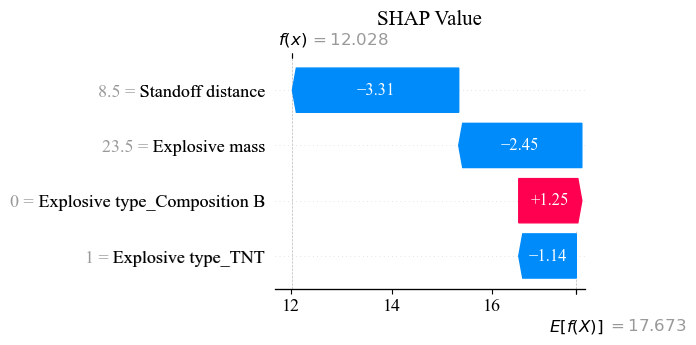

In [21]:
shap.waterfall_plot(shap_values2[75], show=False)
#fig2, ax2 = plt.subplots()
plt.gcf()
plt.gcf().set_size_inches(4,3)
plt.rcParams['font.weight'] = 'normal'
plt.xlabel('SHAP Value', fontsize = 15)

#ax2.set_xlabel('SHAP Value', fontsize = 25)
#ax2.xaxis.set_label_coords(0.5, 0.1)
plt.savefig('SHAP2.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [19]:
print (X_test.iloc[72], "target",y_test.iloc[72])

Explosive mass                   9.5
Standoff distance               13.5
Explosive type_Composition B     0.0
Explosive type_TNT               1.0
Name: 114, dtype: float64 target 28.113000095


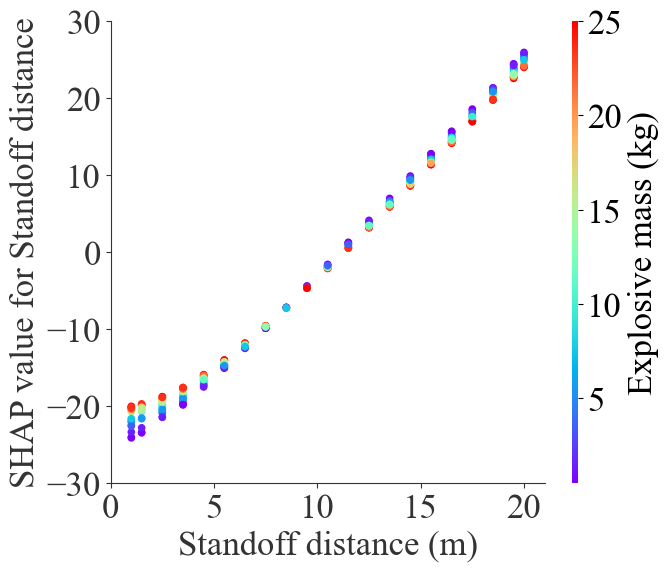

In [24]:
#Partial Dependenace Plot
shap.dependence_plot(1, shap_values[0], X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig3 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Standoff distance", fontsize = 25)
plt.xlabel("Standoff distance (m)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20],fontsize = 25)
plt.xlim (0, 21)
plt.ylim (-30, 30)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax3 = fig3.axes[1] 

# Modifying color bar parameters
cb_ax3.tick_params(labelsize=25)
cb_ax3.set_ylabel("Explosive mass (kg)", fontsize=25)
plt.savefig('SHAP3.png', dpi = 600, bbox_inches = 'tight')
plt.show()

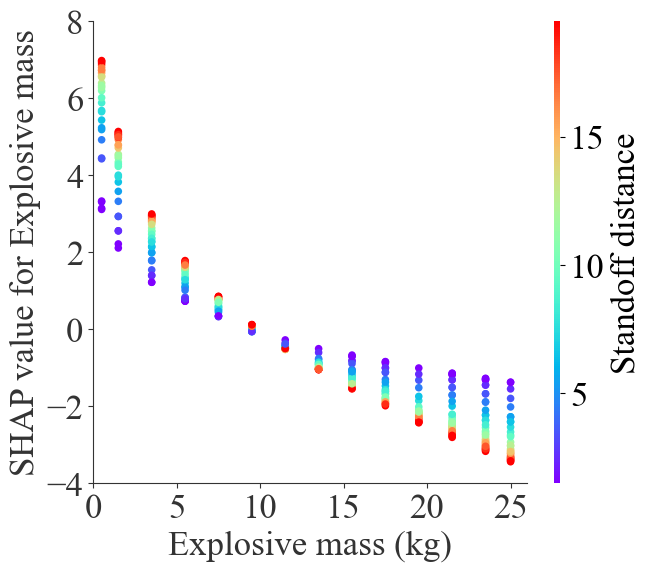

In [26]:
#Partial Dependenace Plot
shap.dependence_plot(0, shap_values[0], X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig4 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Explosive mass", fontsize = 25)
plt.xlabel("Explosive mass (kg)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20, 25],fontsize = 25)
plt.xlim (0, 26)
plt.ylim (-4, 8)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax4 = fig4.axes[1] 

# Modifying color bar parameters
cb_ax4.tick_params(labelsize=25)
cb_ax4.set_ylabel("Standoff distance", fontsize=25)
plt.savefig('SHAP4.png', dpi = 600, bbox_inches = 'tight')
plt.show()

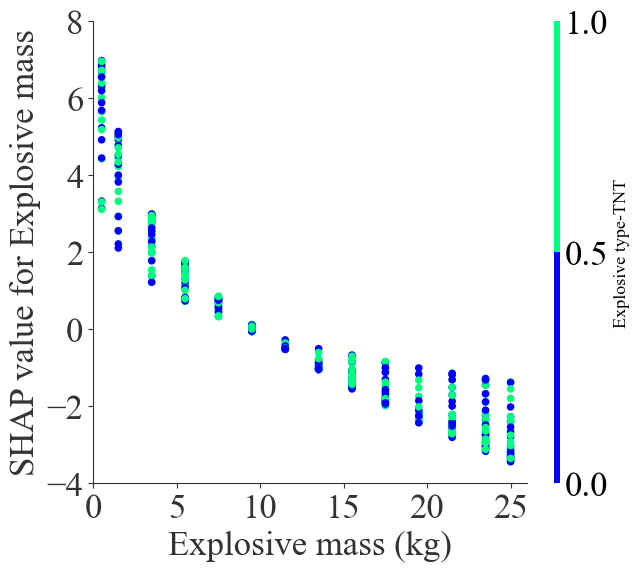

In [28]:
#Partial Dependenace Plot
shap.dependence_plot(ind = 'Explosive mass',
                     shap_values = shap_values[0],
                     features = X_train,
                     feature_names = features,
                     interaction_index = 'Explosive type-TNT',
                     show=False, cmap=plt.get_cmap("winter"), dot_size = 30)
fig5 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Explosive mass", fontsize = 25)
plt.xlabel("Explosive mass (kg)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20, 25],fontsize = 25)
plt.xlim (0, 26)
plt.ylim (-4, 8)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax5 = fig5.axes[1] 

# Modifying color bar parameters
cb_ax5.tick_params(labelsize=25)
#cb_ax5.set_ylabel("Standoff distance", fontsize=25)
plt.savefig('SHAP5.png', dpi = 600, bbox_inches = 'tight')
plt.show()